# From Trust to Disagreement: disentangling the interplay of Misinformation and Polarisation in the News Ecosystem

Donald Ruggiero Lo Sardo<sup>a,b,c</sup>, Emanuele Brugnoli<sup>a,c</sup>, Vittorio Loreto<sup>a,b,c,d</sup>, and Pietro Gravino<sup>e,a,c</sup>

<sup>a</sup> Sony Computer Science Laboratories Rome, Joint Initiative CREF-SONY, Centro Ricerche Enrico Fermi, Via Panisperna 89/A, 00184, Rome, Italy; 

<sup>b</sup> Physics Department, Sapienza University of Rome, Piazzale Aldo Moro 2, 00185 Rome, Italy; cCentro Ricerche Enrico Fermi, Via Panisperna 89/A, 00184, Rome, Italy; 

<sup>d</sup>Complexity Science Hub Vienna, Josefstaedter Strasse 39, 1080, Vienna, Austria; e Sony Computer Science Laboratories Paris, 6, Rue Amyot, 75005, Paris, France


## Abstract

The increasing pervasiveness of fruitless disagreement poses a considerable risk to social cohesion and constructive public discourse. While polarised discussions can exhibit significant distrust in the news, it is still largely unclear whether disagreement is somehow linked to misinformation. In this work, we exploit the results of `Cartesio', an online experiment to rate the trustworthiness of Italian news articles annotated for reliability by expert evaluators. We developed a metric for disagreement that allows for correct comparisons between news with different mean trust values. Our findings indicate that, though misinformation receives lower trust ratings than accurate information, it does not appear to be more controversial. Additionally, we examined the relationship between these findings and Facebook user engagement with news article. Our results show that disagreement correlates with an increased likelihood of commenting, probably linked to inconclusive and long discussions. The emerging scenario is one in which fighting disinformation seems ineffective in countering polarisation. Disagreement focuses more on the divergence of opinions, trust, and their effects on social cohesion. This study offers a foundation for unsupervised news item analysis independent of expert annotation. Incorporating similar principles into the design of news distribution platforms and social media systems can enhance online interactions and foster the development of a less divisive news ecosystem.

## 1. Introduction

In today's digital environment, where every swipe presents a stream of headlines, understanding the trustworthiness of the news we consume has never been more important. Amid the vast expanse of information and opinions, one wonders: What factors truly influence our trust in news? Is it merely the accuracy of content, or are there underlying complexities at play?

Enter the "Cartesio" experiment. This study offers a measured look into Italian news from 09/01/2018 to 12/04/2020, examining public discourse and trust. Garnering insights from over 5,800 participants, "Cartesio" reached its audience through a combination of social media, science fair participations, and word-of-mouth. An interesting observation from the study is that while misinformation tends to receive lower trust scores, it doesn't necessarily generate more debates than conventional news.

Furthermore, the study introduces a metric for 'disagreement', designed for scenarios where opinions exhibit significant imbalances. For those interested in the mechanics behind these findings, this Medium article provides a more in-depth look. Readers are also invited to explore the underlying code and follow the steps in the associated notebook to better understand the methodology and data.

If you're keen on understanding the nuances of news trustworthiness and the factors influencing public discourse, this analysis offers a structured perspective. Let's delve into the findings and explore the broader implications for our digital news ecosystem.

## 2. Data Loading

### 2.1 Prerequisites

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

In [2]:
fontsize=18

### 2.2 Load Data

In [3]:
responses = pd.read_csv('../Data/responses_users_cleaned.csv', index_col=0, dtype={'id':str,
                                                                                   'session_id':str,
                                                                                   'article_id':str,
                                                                                   'created_at':str,
                                                                                   'position':int,
                                                                                   'trust':'int',
                                                                                   'clicked_read_more_at':object})

In [4]:
articles = pd.read_csv('../Data/articles.csv', index_col=0)


## 3. Data Preprocessing
Describe any preprocessing steps such as normalization, handling missing values, etc.

In [5]:
df = responses[['user_id', 'article_id', 'trust']].merge(articles[['id', 'validated_fake']], how='left', left_on='article_id', right_on='id').rename(columns={'validated_fake':'Misinformation'}).replace({'Misinformation':0}, 'No').replace({'Misinformation':1}, 'Yes')
user_means = responses.groupby('user_id')['trust'].mean()

In [6]:
article_means = responses.groupby('article_id')['trust'].mean()

## 4. Analysis
### 4.1 [Analysis 1]
Describe the first analysis performed.

In [7]:
print(articles['created_at'].min())
print(articles['created_at'].max())

2018-01-08
2020-04-12


## 5. Results

/Users/losardo/miniconda3/envs/minimal_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/losardo/miniconda3/envs/minimal_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/losardo/miniconda3/envs/minimal_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


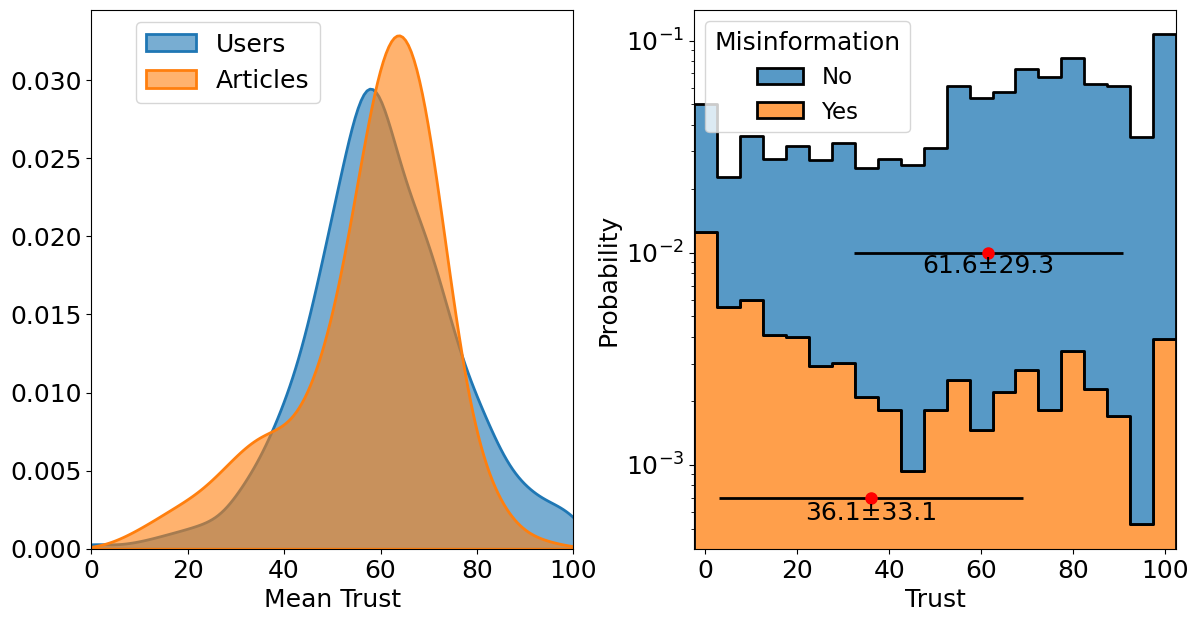

In [8]:
f, axs = plt.subplots(1,2, figsize=(14,7))

sns.set_context("notebook", font_scale=1.5) 

ax=axs[1]
bins = np.arange(-2.5, 103, 5)
sns.histplot(data=df, x='trust', bins=bins, hue='Misinformation', fill=True, stat='probability', element='step',lw=2, multiple='stack', common_norm=True)

mean_value = df[df['Misinformation']=='No']['trust'].mean()
std_deviation = df[df['Misinformation']=='No']['trust'].std()
plt.hlines(y=0.01, xmin=mean_value - std_deviation, xmax=mean_value + std_deviation, color='k', linewidth=2)
plt.plot(mean_value, 0.01, 'ro', markersize=8) 
ax.annotate('{:.1f}±{:.1f}'.format(mean_value, std_deviation), (mean_value, 0.0080), horizontalalignment='center', fontsize=18)

mean_value = df[df['Misinformation']=='Yes']['trust'].mean()
std_deviation = df[df['Misinformation']=='Yes']['trust'].std()
plt.hlines(y=0.0007, xmin=mean_value - std_deviation, xmax=mean_value + std_deviation, color='k', linewidth=2)
plt.plot(mean_value, 0.0007, 'ro', markersize=8) 
ax.annotate('{:.1f}±{:.1f}'.format(mean_value, std_deviation), (mean_value, 0.00055), horizontalalignment='center', fontsize='18')
# sns.boxplot(x='trust', data=df, orient='h', showmeans=True, ax=ax)
plt.xlim([-2.5,102.5])
ax.set_yscale('log')
ax.set_xlabel('Trust', fontsize=18)
ax.set_ylabel('Probability', fontsize=18)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

sns.move_legend(ax, "upper left")
# # Get the current legend
# legend = ax.get_legend()

# # Set the font size for each text in the legend
# for text in legend.get_texts():
#     text.set_fontsize(fontsize)

# legend.get_title().set_fontsize(fontsize-3)

# for patch in legend.get_patches():
#     patch.set_height(15)  # Set the height
#     patch.set_width(40)   # Set the width


ax=axs[0]

sns.kdeplot(data = user_means, fill=True, ax=ax,lw=2, label='Users', alpha=0.6)
sns.kdeplot(data = article_means, fill=True, ax=ax,lw=2, label='Articles', alpha=0.6)
ax.legend(bbox_to_anchor=(0.5, 1), ncols=1, fontsize=fontsize)
ax.set_xlabel('Mean Trust', fontsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

ax.set_ylabel('', fontsize=fontsize)
ax.set_xlim([0,100])



# axins = inset_axes(ax, width=2.5, height=1.7, loc=2)


# axins.set_yticks([])


# sns.histplot(data = user_means, fill=True, ax=axins, kde=False, color='black',element='step',lw=2)
# sns.histplot(data = user_means, fill=False, ax=axins, kde=True, color='black')

# axins.set_xlabel('User Mean Trust', fontsize=16)

# plt.legend(loc='upper left')

# sns.despine()
plt.subplots_adjust(wspace=0.25)

plt.savefig('../Figures/Fig1-dataAnal.png', bbox_inches='tight', transparent=True, dpi=300)
plt.savefig('../Figures/Fig1-dataAnal.eps', bbox_inches='tight', format='eps')

**Figure 2:** _Left._ The mean trust values of users (blue) and articles (orange). The bell-shaped curves are Gaussian decompositions of the probability densities. _Right._ The distribution of trust in the news labelled as misinformation (orange) and not (blue). The histogram displays the probability of each trustbin (size=5), showing the share of misinformation for each bar in orange. The top horizontal line displays the mean and standard deviation of the trust rating given to non-misinformation news items. In contrast, the bottom one displays the mean and standard deviation of the rating given to misinformation.

In [9]:
print(user_means.mean(), user_means.std())

59.888339377651775 15.642761658241723


In [10]:
import scipy
responses['mean_trust'] = responses.groupby('article_id')['trust'].transform(np.mean)
responses['bin_mean_trust'] = pd.cut(responses['mean_trust'], 10)
bins_mt = responses.sort_values(by='bin_mean_trust')['bin_mean_trust'].unique()
bins=np.linspace(0,100, 21)
div_data_list = []
for bin in bins_mt:
    bin_hist, _ = np.histogram(responses[responses['bin_mean_trust'] == bin]['trust'], bins=bins, density=True)
    div_data_list.append(bin_hist)
div_data = np.vstack(div_data_list)
mid_points = [np.round(iv.mid) for iv in bins_mt]
plot_data = {}
plot_data['x'] = np.linspace(0,10, 30)
plot_data['y'] = np.linspace(0,100,60)
plot_data['z'] = scipy.ndimage.zoom(div_data.T, 3)
plot_data['mid_points'] = mid_points

/var/folders/tw/qfrh4tjj1sq9_3xp__m5ylbh0000gn/T/ipykernel_65170/2968590579.py:2: FutureWarning: The provided callable <function mean at 0x1149b3e20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  responses['mean_trust'] = responses.groupby('article_id')['trust'].transform(np.mean)


In [11]:
line_add = responses.groupby('article_id')['trust'].agg(['mean', 'std'])
line_add['bin_min_trust'] = pd.cut(line_add['mean'], 30, labels=np.linspace(0,10,30))

In [12]:
t = line_add.groupby('bin_min_trust')['std'].agg(['mean', 'std']).reset_index()
t=t.dropna()

/var/folders/tw/qfrh4tjj1sq9_3xp__m5ylbh0000gn/T/ipykernel_65170/2813524962.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t = line_add.groupby('bin_min_trust')['std'].agg(['mean', 'std']).reset_index()


/var/folders/tw/qfrh4tjj1sq9_3xp__m5ylbh0000gn/T/ipykernel_65170/1027181737.py:19: RuntimeWarning: invalid value encountered in log
  CS = ax1.contourf(plot_data['x'], plot_data['y'], np.log(plot_data['z']/plot_data['z'].sum()), 10, cmap='Spectral_r')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


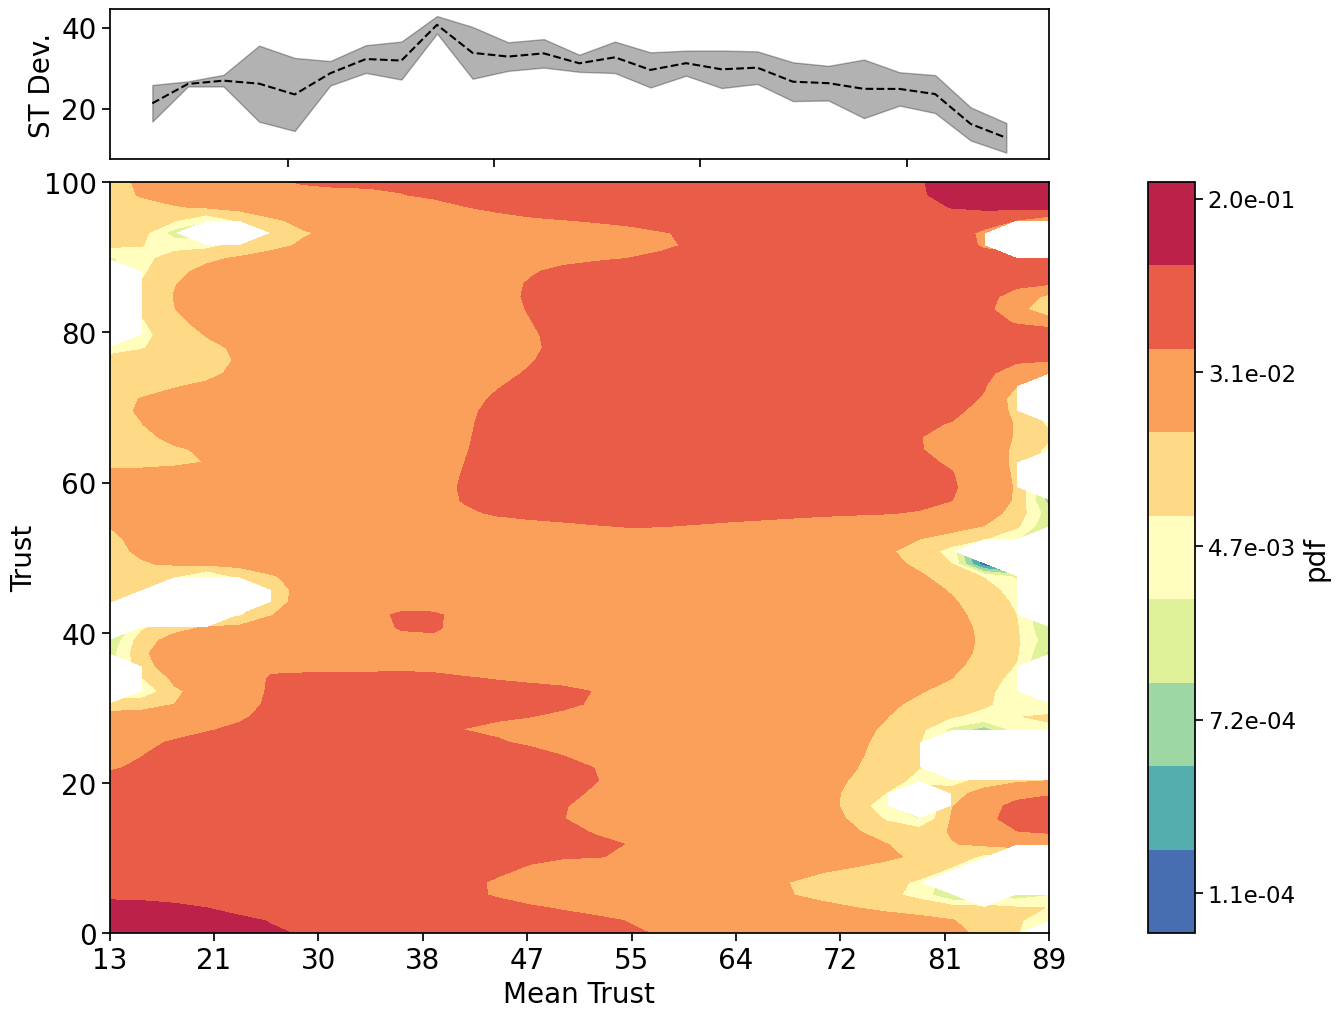

In [13]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(14,12))
fontsize = 20

# Define the grid layout
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 0.05], height_ratios=[1, 5])

# Add the line plot to the top grid
ax0 = plt.subplot(gs[0])
ax0.fill_between(t['bin_min_trust'], t['mean']-t['std'], t['mean']+t['std'], color='k', label='Standard Deviation', alpha=0.3)
ax0.plot(t['bin_min_trust'], t['mean'], color='k', ls='--')
ax0.tick_params(axis='x', labelsize=fontsize)
ax0.tick_params(axis='y', labelsize=fontsize)
ax0.set_xticklabels([])
ax0.set_ylabel('ST Dev.', fontsize=fontsize)

# Add the heatmap to the bottom grid
ax1 = plt.subplot(gs[2])
CS = ax1.contourf(plot_data['x'], plot_data['y'], np.log(plot_data['z']/plot_data['z'].sum()), 10, cmap='Spectral_r')
ax1.set_xticks(np.linspace(0,10,10))
ax1.set_xticklabels(np.array(plot_data['mid_points']).astype(int).astype(str))
ax1.tick_params(axis='x', labelsize=fontsize)
ax1.tick_params(axis='y', labelsize=fontsize)
ax1.set_xlabel('Mean Trust', fontsize=fontsize)
ax1.set_ylabel('Trust', fontsize=fontsize)

# Add the colorbar to the right of the heatmap
cbar = fig.colorbar(CS, ticks=np.linspace(-20.4, -4.8, 6), cax=plt.subplot(gs[3]))
cbar.ax.set_yticklabels(["{:.1e}".format(x) for x in np.exp(np.linspace(-11, -1.6, 6))])
cbar.ax.set_ylabel('pdf', fontsize=fontsize)

fig.subplots_adjust(hspace=0.05)
plt.savefig('../Figures/valley.png', bbox_inches='tight', transparent=True, dpi=300)
plt.savefig('../Figures/valley.eps', bbox_inches='tight', format='eps')

**Figure 3:** _Top._ A display of the values of the standard deviation at different
mean trust values. The line indicates the mean standard deviation, while the
shaded area is the root of the variance. The parabolic shape is to be expected
in a bounded interval. __Bottom.__ Trust distribution as a function of the average
rating obtained by the rated news article. The horizontal axis displays the mean
trust received by news items. The vertical axis is the value of individual trust
ratings. The colour indicates the density of trust scores received by news items
with a given mean trust.

In [14]:
from scipy.stats import beta

alpha_fit, beta_fit, _, _ = beta.fit(df.trust)
disar = []
for i in range(10000):
    example = np.random.randint(0, 100, 17175)
    mu2 = example.mean()
    sigma2 = example.std()
    disar.append(np.sqrt(sigma2 * sigma2 / (mu2 * (100 - mu2))))
disar = np.array(disar)
disar2 = []
for i in range(10000):
    example = np.random.beta(alpha_fit, beta_fit, size=17175) * 100
    mu2 = example.mean()
    sigma2 = example.std()
    disar2.append(np.sqrt(sigma2 * sigma2 / (mu2 * (100 - mu2))))
disar2 = np.array(disar2)
p, bins = np.histogram(df['trust'], bins=np.arange(-2.5, 103, 5), density=True)
p = p * 5
disar3 = []
for i in range(10000):
    example = np.random.choice(np.arange(0, 101, 5), size=17175, replace=True, p=p)
    mu2 = example.mean()
    sigma2 = example.std()
    disar3.append(np.sqrt(sigma2 * sigma2 / (mu2 * (100 - mu2))))
disar3 = np.array(disar3)
mu = df['trust'].mean()
sigma = df['trust'].std()
GLOBAL_DISAGREEMENT = np.sqrt(sigma * sigma / (mu * (100 - mu)))

In [15]:
RTPanel = {}
RTPanel['UniformEx'] = np.random.randint(0, 100, 17299)
RTPanel['BetaEx'] = np.random.beta(alpha_fit, beta_fit, size=17299) * 100
RTPanel['SampleEX'] = np.random.choice(np.arange(0, 101, 5), size=17299, replace=True, p=p)
RTPanel['DataDF'] = df
RTPanel['DisagUniDist'] = disar
RTPanel['DisagBetaDist'] = disar2
RTPanel['DisagSampleDist'] = disar3
RTPanel['GlobalDisag'] = GLOBAL_DISAGREEMENT

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


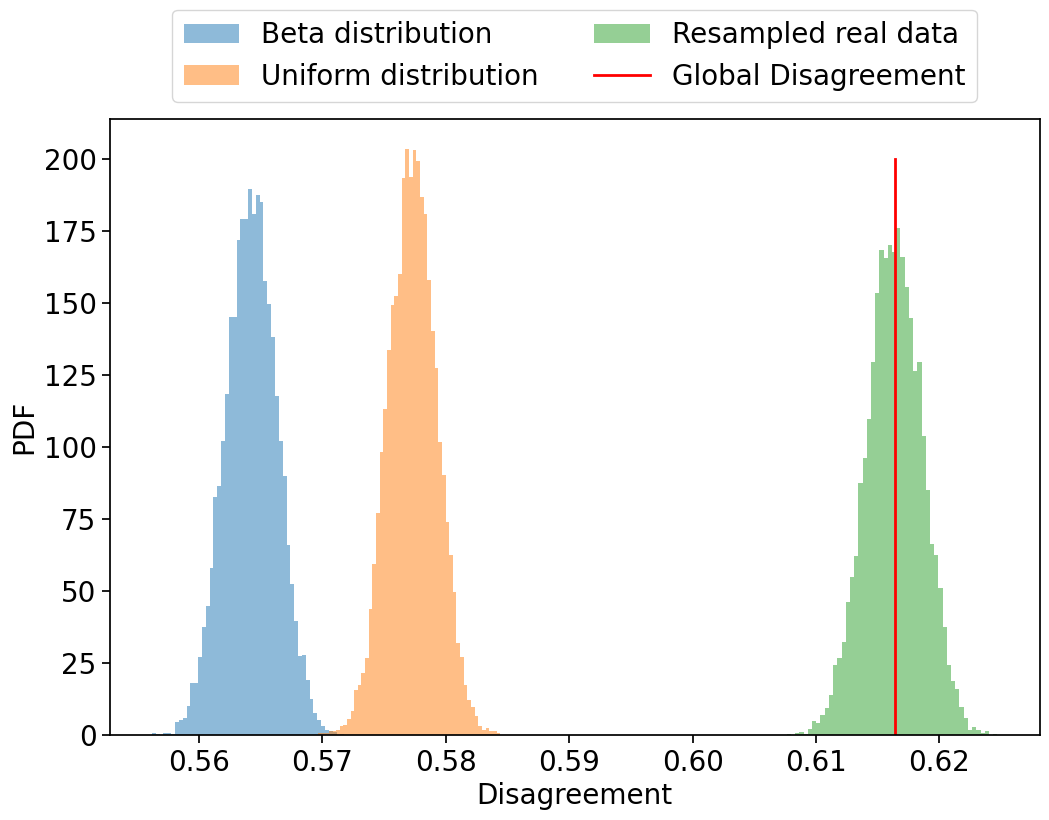

In [16]:
f, axs = plt.subplots(figsize=(12,8))
example = RTPanel['UniformEx']
# ax = axs[0]
# df = RTPanel['DataDF']
# ax.hist(df['trust'], bins=20, color='red', label = 'Cartesio data', linewidth=2)
# ax.hist(example, bins=np.arange(0,101,5), alpha=0.5, label='Uniform distribution', fill=False, histtype='step', linewidth=2)
# example = RTPanel['BetaEx']
# ax.hist(example, bins=np.arange(0,101,5), alpha=0.5, label='Beta distribution', fill=False, histtype='step', linewidth=2)
# example = RTPanel['SampleEX']
# ax.hist(example, bins=np.arange(0,101,5), alpha=0.5, label='Resampled real data', fill=False , histtype='step', linewidth=2)
# ax.set_xlabel('Trust', fontsize=fontsize)
# ax.set_ylabel('Counts', fontsize=fontsize)
# ax.legend(fontsize=14, loc='upper left')

ax = axs

ax.hist(RTPanel['DisagBetaDist'], density=True, bins=50, linewidth=0, label='Beta distribution', alpha=0.5)
ax.hist(RTPanel['DisagUniDist'], density=True, bins=50, linewidth=0, label='Uniform distribution', alpha=0.5)
ax.hist(RTPanel['DisagSampleDist'] , density=True, bins=50, linewidth=0, label='Resampled real data', alpha=0.5)

ax.plot([RTPanel['GlobalDisag'], RTPanel['GlobalDisag']], [0,200], c='red', label='Global Disagreement', linewidth=2)
ax.set_xlabel('Disagreement', fontsize=fontsize)
ax.set_ylabel('PDF', fontsize=fontsize)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncols=2, fontsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

plt.savefig('../Figures/SyntheticDisag.png', bbox_inches='tight', transparent=True, dpi=300)
plt.savefig('../Figures/SyntheticDisag.eps', bbox_inches='tight', format='eps')

**Figure 4:** A display of the distributions of disagreement. In red is the actual
value from participant evaluations of news. As references, we sampled 10000
times the same number of votes of the actual dataset (17175) from a uniform
distribution (in orange), from β-distribution with mean and variance equal to
those observed in the dataset (in blue), from the actual distribution emerging
from the experiment and represented in Figure 2 (in green).

In [17]:
art_info = df.groupby('article_id').agg({'trust':['max', 'min', 'mean', 'std']})
art_info.columns = [x+'_trust' for x in art_info.columns.get_level_values(1)]
art_info['max_std'] = np.sqrt(((100-art_info['mean_trust'])*art_info['mean_trust']))
art_info['disagreement'] = art_info['std_trust']/art_info['max_std']
art_info.loc[art_info['disagreement'] == np.inf, 'disagreement'] = 0
art_info['interval'] = pd.cut(art_info['mean_trust'], bins=np.arange(0,101,10))
art_info  = art_info.merge(articles[['id', 'validated_fake']], how='left', left_on='article_id', right_on='id')
art_info['x'] = art_info['interval'].apply(lambda x: x.mid)


In [18]:
art_info_longform = art_info[['disagreement', 'x', 'validated_fake', 'id']].melt(id_vars=['x', 'id', 'validated_fake'])

In [19]:
temp = art_info_longform.groupby(['x','validated_fake'])['value'].agg(['mean', 'std', 'count'])
temp['std_mean'] = temp['std']/np.sqrt(temp['count'])
temp.reset_index(inplace=True)

/var/folders/tw/qfrh4tjj1sq9_3xp__m5ylbh0000gn/T/ipykernel_65170/2996021104.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = art_info_longform.groupby(['x','validated_fake'])['value'].agg(['mean', 'std', 'count'])


In [20]:
plot_data2 = {}
trues = temp[temp['validated_fake']==0]
fakes = temp[temp['validated_fake']==1]
all_ = art_info_longform.groupby('x')['value'].agg(['mean', 'std', 'count']).reset_index()
plot_data2['all_line'] = all_
plot_data2['validated_fake_line'] = fakes
plot_data2['Others_line'] = trues
trues = art_info[art_info['validated_fake']==0]
fakes = art_info[art_info['validated_fake']==1]
plot_data2['validated_fake_points'] = trues
plot_data2['Others_points'] = fakes

/var/folders/tw/qfrh4tjj1sq9_3xp__m5ylbh0000gn/T/ipykernel_65170/2467843922.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_ = art_info_longform.groupby('x')['value'].agg(['mean', 'std', 'count']).reset_index()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


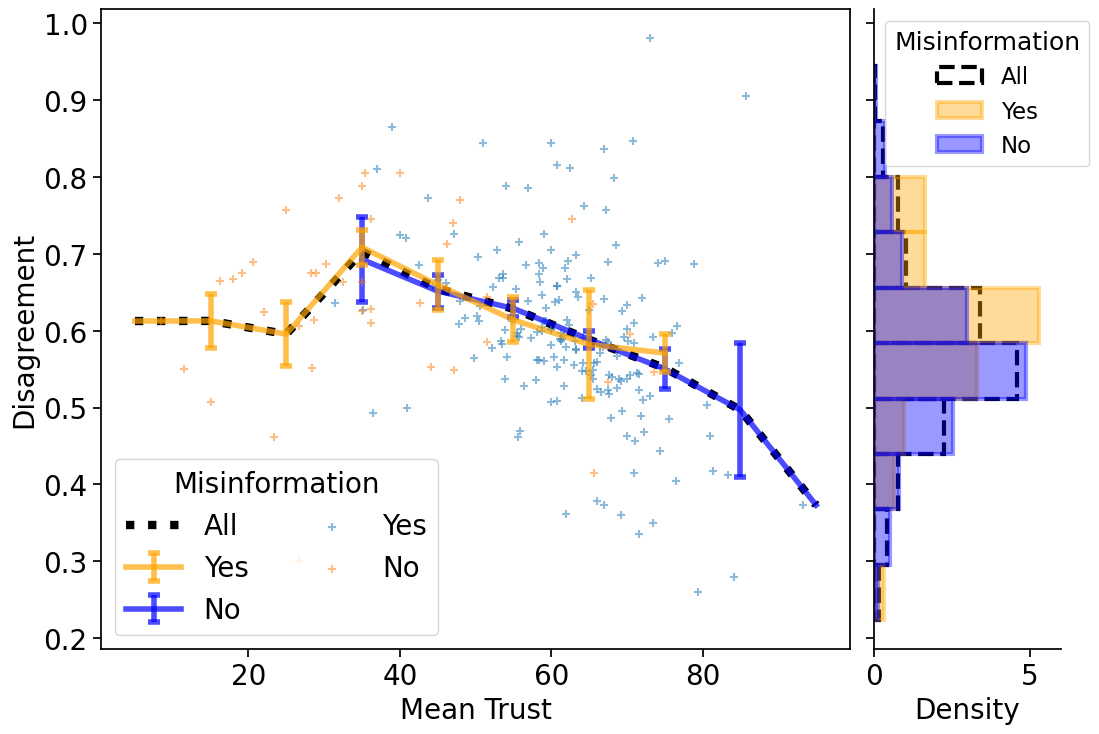

In [21]:
fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(1, 2,  width_ratios=(4, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[0])
# ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1], sharey=ax)

la, = ax.plot(plot_data2['all_line']['x'], plot_data2['all_line']['mean'], ls=':', lw=6, zorder=0, color='k', label='all')
em = ax.errorbar(plot_data2['validated_fake_line']['x'],
             plot_data2['validated_fake_line']['mean'],
             plot_data2['validated_fake_line']['std_mean'],
             elinewidth=4, capsize=4, mew=4, lw=4, zorder=2, alpha=0.7, label= 'Yes', color='orange')
et = ax.errorbar(plot_data2['Others_line']['x'],
             plot_data2['Others_line']['mean'],
             plot_data2['Others_line']['std_mean'],
             elinewidth=4, capsize=4, mew=4, lw=4, zorder=1, alpha=0.7, label='No', color='blue')

sm = ax.scatter(plot_data2['validated_fake_points'] ['mean_trust'],
            plot_data2['validated_fake_points'] ['disagreement'],
            marker = '+', alpha=0.5, label='Yes')
st = ax.scatter(plot_data2['Others_points']['mean_trust'],
            plot_data2['Others_points']['disagreement'],
            marker = '+', alpha=0.5, label='No')
ax.set_xlabel('Mean Trust', fontsize=fontsize)
ax.set_ylabel('Disagreement', fontsize=fontsize)
legend=ax.legend(handles=[la, em, et, sm, st], labels=['All', 'Yes', 'No', 'Yes', 'No'], ncol=2,fontsize=fontsize, title='Misinformation')
plt.setp(legend.get_title(),fontsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

# ax_histx.bar(plot_data2['all_line']['x'], plot_data2['all_line']['count'], width=10, alpha=0.7)
# ax_histx.spines[['right', 'top']].set_visible(False)
# ax_histx.tick_params(labelbottom=False)
# ax_histx.tick_params(axis='y', labelsize=fontsize)
# ax_histx.set_ylabel('Count', fontsize=fontsize)
# plt.setp(ax_histx.get_xticklabels(), visible=False)

counts, bins=np.histogram(art_info['disagreement'], density=True)
ax_histy.barh(bins[:-1], counts, height=bins[1]-bins[0], alpha=1, fill=False, lw=3, ls='--', label='All')
counts, bins=np.histogram(art_info[art_info['validated_fake']==1]['disagreement'], bins=bins, density=True)
ax_histy.barh(bins[:-1], counts, height=bins[1]-bins[0], alpha=0.4, edgecolor='orange', lw=3, color='orange', label='Yes')
counts, bins=np.histogram(art_info[art_info['validated_fake']==0]['disagreement'], bins=bins, density=True)
ax_histy.barh(bins[:-1], counts, height=bins[1]-bins[0], alpha=0.4, edgecolor='blue', lw=3, color='blue', label='No')
ax_histy.set_xlim([0, 6])
ax_histy.spines[[ 'right', 'top']].set_visible(False)
ax_histy.tick_params(labelleft=False)
ax_histy.set_xlabel('Density', fontsize=fontsize)
ax_histy.tick_params(axis='x', labelsize=fontsize)
ax_histy.legend(title='Misinformation')


plt.savefig('../Figures/Fig3_disag.png', bbox_inches='tight', dpi=300, transparent=True)
plt.savefig('../Figures/Fig3_disag.eps', bbox_inches='tight', format='eps')


**Figure 5:** The relation between the mean trust and the user disagreement for
misinformation and other news items. The horizontal axis reports the mean
trust of news items. The vertical axis displays the disagreement score of news
items. Each news item is a point in this space. The blue and orange lines show
the average disagreement as a function of the mean trust for regular news items
and news items labelled as misinformation, respectively. The error bars display
the standard deviation around the mean. The histograms on the right display
the distribution of disagreement for all news items and, separately, for those
labelled as misinformation or not.

## 6. Discussion

In the present study, we sought to elucidate the underlying mechanisms of [topic/phenomenon]. Our findings provide a novel perspective on the intricate interplay between [X] and [Y], shedding light on several previously unexplored aspects.

Our primary observation of [specific finding] corroborates earlier work by Smith et al. (2015), yet contrasts with the results presented by Johnson and Lee (2018). This discrepancy could be attributed to differences in experimental design, sample populations, or analytical techniques. It underscores the complexity of [topic/phenomenon] and the importance of contextual nuances.

Interestingly, our secondary analysis revealed [another specific finding], a pattern not reported in prior studies. This could signify a potential new avenue of research, warranting further in-depth investigation. The implications of this are manifold, with potential applications in [relevant field or industry].

However, our study is not without limitations. The sample size was relatively modest, which might affect the generalizability of our results. Additionally, the cross-sectional nature of our research design precludes any definitive conclusions about causality. Future research employing longitudinal or experimental designs would be instrumental in establishing cause-and-effect relationships.

In conclusion, while our findings offer valuable insights into [topic/phenomenon], they also underscore the multifaceted nature of the subject. We advocate for a holistic approach, integrating various methodologies and perspectives, to gain a more comprehensive understanding. As the field continues to evolve, collaborative and interdisciplinary efforts will be paramount in unraveling the intricacies of [topic/phenomenon].

## 7. Conclusion
The prevalence of sterile disagreement poses a significant threat to social cohesion and meaningful public discussions. This disagreement is frequently associated with spreading misinformation, but the specific relationship between misinformation and its role in driving disagreement and polarisation remains unclear.
Throughout this study, we have examined the critical intersection between
perceived contentious news media content and its links to misinformation, thus
investigating the roots of disagreement and polarisation in public discourse.
By conducting an experiment in which participants were asked to rate Italian
news articles, we unearthed a nuanced landscape where misinformation, despite
receiving lower trust ratings, did not seem to cause more controversial outcomes.
Our developed metric for disagreement, which accounted for both predominant opinions and distinct communities, provided valuable insights into the nature and dynamics of contentious discourse. Using both artificial trust distributions and our experimental data, we were able to outline a comprehensive
profile of disagreement at both the community and individual news item levels.
We contend that this finding indicates that labeling misinformation might
not be the best strategy for reducing tensions in social dialogue. While labelling
misinformation is an important activity for the health of the media landscape, by
making it possible to score the reliability of sources and enabling users to source
content, the perception that this is often a partisan activity can foster more
significant division [25]. Reporting disagreement of news articles or including it
in feed algorithms can be a pathway to more constructive social dialogue.
Significantly, our findings underscored the complex relationship between the
reliability of news and the patterns of its social media engagement. We found
disagreement was associated with a higher likelihood of commenting, revealing
the paradoxical ways contentious news can circulate and stimulate discussion
within digital spaces. Although stimulating online discussion in the news can be
seen as a net positive for the community, there is evidence that longer discussions
lead to higher levels of toxicity [7]. If it were to hold at scale, this observation
would constitute a potential warning for the kind of material that could be
more divisive and, therefore, problematic for social dialogue. Platforms that
prioritize content that triggers engagement, such as comments, can inflate the
salience of controversial topics by increasing their visibility. This, in turn, can
lead to increased stress and anxiety in users who will try to avoid negative
interactions. It has also been shown that this causal chain can explain the birth
of echo chambers [20, 5].
The work presented here can be improved in many ways. Of course, by
replicating the experiment on larger communities and different countries, we can
test the validity of our conclusion and the universality of phenomenology. Also,
it would be interesting to study the dependencies of trust within specific topics
and how disagreement, a ‘microscopic’ feature, is linked to the polarisation of
the community, which can be considered a structural property of the whole
system.
This research lays a solid foundation for unsupervised news item analysis
that listen to and leverages users’ opinion. While fact-checking and generally
high professional standard journalism are crucial against misinformation, more
is needed to fight polarisation. The proposed approach focuses on exploring the
diversity of opinions and their impacts on social cohesion. It highlights the need
for innovative strategies that can integrate our understanding of disagreement
and misinformation into the design of news distribution platforms and social
media systems. By doing so, we can enhance online interactions, foster a more
informed public, and pave the way for the evolution of a more reliable digital
news ecosystem. This is a critical step towards mitigating disagreement, bolstering social harmony, and reinvigorating constructive discourse in our society.

## 8. Reproducibility
### 8.1 Requirements
Requirements for Reproducibility of Analysis

Programming Language: Python

The analysis is implemented in Python. It is recommended to use the latest stable release of Python for optimal compatibility.
Required Libraries and Their Versions:

*matplotlib:* A Python 2D plotting library. Used for creating static, interactive, and animated visualizations in Python.
*numpy:* A library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
*pandas:* An open-source data analysis and manipulation tool, built on top of the Python programming language.
*seaborn:* A Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
The specific versions of these libraries should match those used in the original analysis to ensure compatibility. If the versions are not specified, it is advisable to use the latest stable releases of these libraries.
*scipy:* An open-source Python library used for scientific and technical computing. It includes modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers, and other tasks common in science and engineering.

*Environment Configuration:*

It is advisable to use a virtual environment to manage dependencies. Tools such as venv (for Python virtual environments) or conda (for Anaconda environments) can be used.
An environment.yml or requirements.txt file should be provided, listing all the necessary packages and their versions to create an identical environment.
Code and Documentation:

All Python scripts used in the analysis must be provided, preferably with detailed comments explaining each step of the process.
A README file or equivalent documentation should be included, detailing the steps to set up the environment, execute the scripts, and any other necessary instructions to reproduce the analysis.
Version Control:

If possible, use a version control system like Git and a platform like GitHub to manage and share the code. This ensures that changes and different versions of the analysis are tracked and accessible.
Operating System Compatibility:

Note any specific operating system requirements or compatibility notes, if applicable.
By adhering to these requirements, the reproducibility of the analysis can be significantly enhanced, ensuring that other researchers or collaborators can replicate the results with minimal discrepancies.

### 8.2 Data Availability
Provide information on how to access the data used in the analysis. If the data is proprietary or confidential, mention the restrictions.

## 9. Acknowledgements
Acknowledge any funding sources, collaborators, or other relevant parties.

## 10. References
List all references cited in the notebook.


You can adapt this template to your specific needs, and expand on each section as required. Make sure to provide all necessary information for readers to understand and reproduce the analyses. If the paper involves complex systems or specific tools from physics and mathematics, consider adding dedicated sections or appendices that go into more detail about the methodologies used.




